In [138]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# We need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

1. Read Graph from the given movie_actor_network.csv note that the graph is bipartite graph
2. using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph
3. Apply Clustering Algorithm to group similar actors

	a. For this task consider only the actor nodes <br>
	b. Apply any clustering algorithm of your choice <br>
	c. Choose the number of clusters for which you have maximum score of <b>$Cost1*F(Cost2)*Cost3$</b> where $F(x) = x*(1-x)$<br>
	
    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	Cost2 = $\frac{\text{max(number of actor nodes in cluster)}}{\text{total_number_of_actor_nodes}}$ <br><br>
    
	Cost3 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
    
	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*F(Cost2)*Cost3
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node<br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color


4. Apply Clustering Algorithm to group similar movies<br>
	a. for this task consider only the movie nodes<br>
	b. apply any clustering algorithm of your choice<br>
	c. choose the number of clusters for which you have maximum score of $Cost1*F(Cost2)*Cost3$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
	Cost2 = $\frac{\text{max(number of movie nodes in cluster)}}{\text{total_number_of_movie_nodes}}$ <br><br>
	Cost3 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ where N= number of clusters 

	<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
		computer the metric Cost = Cost1*(Cost2)*(1-Cost2)*Cost3
	return number_of_clusters which have maximum Cost
	</pre>

	d. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
	e. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
	f. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color
	


<img src='https://i.imgur.com/ZLWQEhL.jpg'>

### these links and function might be usefull while solving this assignment
1. what is bipartite graph: https://en.wikipedia.org/wiki/Bipartite_graph
2. Ego graph: https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.ego.ego_graph.html
3. Combining two are more graphs: https://stackoverflow.com/a/32652764/4084039
    ex: if you want to merge three graphs which are mentiond in the above image, you can write like this
    <pre>
    U=nx.Graph()
    for i in number of clusters:
        if U is empty:
            U.add_edges_from(ith Cluster's graph.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)) 
        else:
            U.add_edges_from(ith Cluster's graph.edges(data=True)+U.edges(data=True))
            U.add_nodes_from(ith Cluster's graph.nodes(data=True)+U.nodes(data=True))
    </pre>
4. connected components:  https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html
5. Degree of a node: https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html
6. Neighbors of node: https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.Graph.neighbors.html

In [2]:
# hint: you can refer facebook case study notebook to solve this assignment in couple of hours
data=pd.read_csv('../../datafiles/Clustering/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [86]:
g=nx.Graph()
g.add_nodes_from(data['movie'],bipartite=0,label='movie')
g.add_nodes_from(data['actor'],bipartite=1,label='actor')
g.add_edges_from([(r['movie'],r['actor']) for i,r in data.iterrows()],label='acted')

In [18]:
data.movie.value_counts()

m1094    77
m67      66
m1100    54
m1095    48
m1111    48
         ..
m107      1
m98       1
m806      1
m1203     1
m1371     1
Name: movie, Length: 1292, dtype: int64

- We have 1292 unique movies / movie nodes out of 9650 edges(from data)

In [16]:
data.actor.value_counts()

a973     197
a967     171
a964     144
a970     127
a1028    120
        ... 
a2846      1
a2413      1
a1116      1
a2632      1
a3572      1
Name: actor, Length: 3411, dtype: int64

- We have 3411 unique actors / actor nodes out of 9650 edges(from data)

In [27]:
m, a = nx.bipartite.sets(g)

In [28]:
len(m)

1292

This is correct as we have 1292 unique movies

In [29]:
len(a)

3411

This is correct as we have 3411 unique actors

In [31]:
len(g.edges())

9650

This is correct as we have 9650 rows in 'data'

In [34]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 4703
Number of edges: 9650
Average degree:   4.1038


- Finding the connecte dcomponents

In [59]:
len(list(nx.connected_components(g)))

1

This means that the whole graph is connected and is not been divided into sub graphs

len(list(nx.connected_components(g))\[0\])

` 4703`

Therefor we have all the nodes in this componen that means there is only one connected component

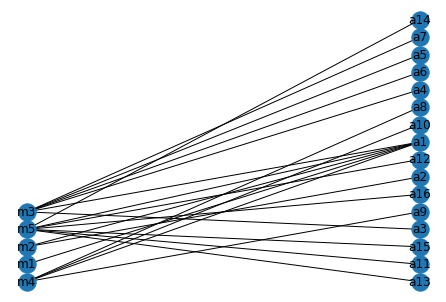

In [83]:
subg=nx.Graph()
subg.add_nodes_from(data['movie'][:10],bipartite=0)
subg.add_nodes_from(data['actor'][:10],bipartite=1)
subg.add_edges_from([(r['movie'],r['actor']) for i,r in data[:20].iterrows()])
sm, sa = nx.bipartite.sets(subg)

pos = {}
pos.update((node, (1, index)) for index, node in enumerate(sm))
pos.update((node, (2, index)) for index, node in enumerate(sa))

nx.draw(subg, pos=pos)
# for p in pos:  # raise text positions
#     pos[p][1] += 0.25
nx.draw_networkx_labels(subg, pos)
plt.show()

In [122]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(g))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(g.nodes()), # root nodes
               length=200,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [116]:
# Average length of path of walk form each node.
sum([len(x) for x in walks])/len(walks)

200.0

In [123]:
model = Word2Vec(walks, size=128, window=5)
model.wv.vectors.shape

(4703, 128)

In [124]:
len(model.wv.index2word)

4703

In [125]:
transform = TSNE  

trans = transform(n_components=2)
n2 = TSNE(n_components=2).fit_transform(model.wv.vectors)
len(n2)

In [130]:
n2[:,1]

array([ 64.55444 ,  66.887856,  63.919754, ...,  15.299874, -32.877136,
        15.645226], dtype=float32)

In [154]:
labels = [g.nodes[x]['label'] for x in model.wv.index2word]
pd.Series(labels).value_counts()

actor    3411
movie    1292
dtype: int64

In [140]:
fig = plt.figure(figsize=(8,8))
plt.scatter(n2[:,0],n2[:,1])
# plt.show()
plt.close()

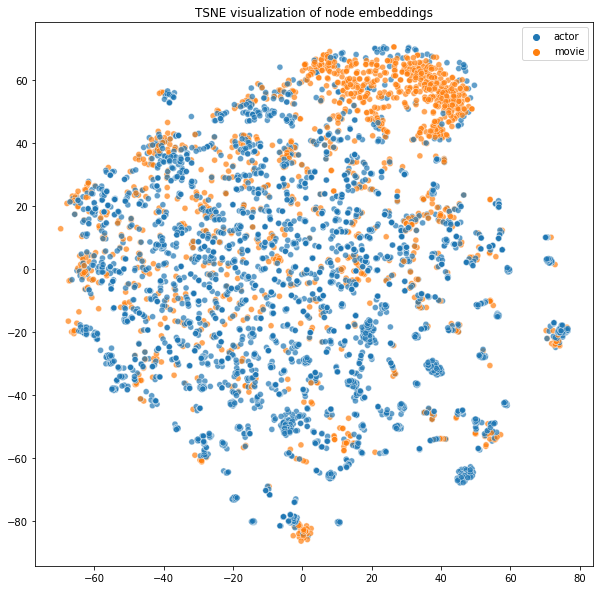

In [167]:
fig = plt.figure(figsize=(10,10))
plt.title('{} visualization of node embeddings'.format(transform.__name__))
_ = sns.scatterplot(n2[:,0],n2[:,1],hue=labels,alpha=0.7)
# plt.close()

# Actor

- ## K-Means

In [338]:
df = pd.DataFrame(model.wv.vectors,index=model.wv.index2word)
df['labels'] = labels
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,labels
a973,1.508271,-0.129284,-1.498089,-1.314908,0.551356,-1.552054,1.518860,0.613986,-1.382501,2.774122,...,0.980744,-2.044317,0.236125,0.345849,-1.101458,-2.140466,-1.490862,0.240603,1.216922,actor
a967,1.787629,1.708852,-2.125663,-0.326688,-0.622349,-0.316439,0.586352,-0.430185,-1.987778,1.089581,...,0.803266,-1.379366,2.889650,-0.432448,-0.674887,-0.441979,-1.158795,-0.110391,0.724673,actor
a964,2.682146,0.333002,-0.582592,-1.432443,0.121492,-1.631985,0.693885,0.704498,-2.444281,3.048823,...,0.837435,-1.636916,0.826380,1.083882,-1.013783,-2.403611,-0.652596,0.006691,1.146737,actor
a1731,0.727439,0.790221,0.129922,-0.792030,-1.611296,-0.613351,1.520313,1.986411,0.686073,-1.014676,...,-0.713471,0.270898,1.028719,-1.066744,-0.373756,-1.297639,1.089908,2.293507,1.271696,actor
a970,2.913384,0.796885,-0.493588,-1.131890,0.253544,-0.095703,0.865628,-0.704544,-0.831998,1.245881,...,-0.536826,-1.832830,1.709956,0.034701,0.405019,-1.351691,-0.766126,0.895284,0.401942,actor


In [295]:
def cost(kmeans,g,X):
    metric1 = 0
    metric2 = 0
    X['cluster'] = kmeans.labels_
    for i in np.unique(kmeans.labels_):
        sub_nodes = list(X.cluster[X.cluster==i].index)+list(m)
        sub_g = g.subgraph(sub_nodes)
        giant = max(nx.connected_components(sub_g), key=len)
        metric1 = metric1 + (len(giant)/sub_g.number_of_nodes())

        deg_sum = 0
        for x in list(X.cluster[X.cluster==i].index):
            deg_sum = deg_sum + sub_g.degree(x)
        unique_movies = 1292 -len(list(nx.isolates(sub_g))) # 1292 is the total no. of movie nodes in whole 'g'
        metric2 = metric2 + (deg_sum/unique_movies)
    cost1 = metric1/len(np.unique(kmeans.labels_))
    cost2 = X.groupby(['cluster']).count()[0].max()/X.shape[0]
    cost3 = metric2/len(np.unique(kmeans.labels_))
    return cost1*cost2*(1-cost2)*cost3

In [339]:
X = df[df.labels=='actor'].drop(['labels'],axis=1)
for n in [ 2, 3, 4, 5, 10, 30, 50, 100, 200, 500]:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(X)
    print('Cost = {:.3f} for number of clusters = {}'.format(cost(kmeans,g,X),n))

## we can see that n=3 give us best results

In [342]:
kmeans = KMeans(n_clusters=3, random_state=445).fit(X)
cost(kmeans,g,X)

0.3253446501771655

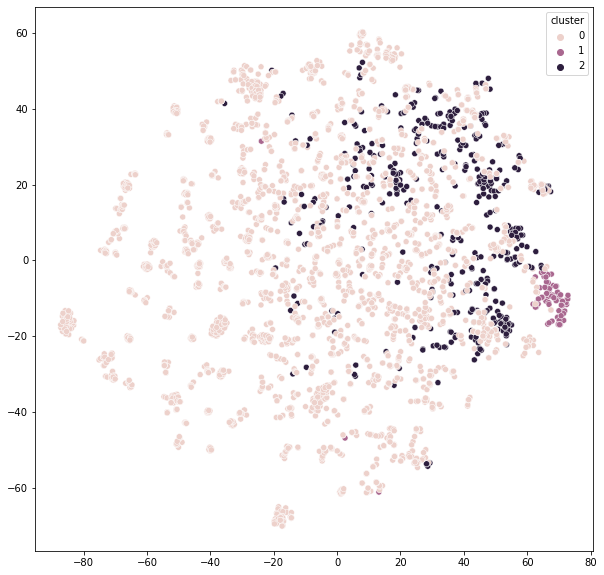

In [347]:
# nX = TSNE(n_components=2).fit_transform(X.drop(['cluster'],axis=1))
fig = plt.figure(figsize=(10,10))
_ = sns.scatterplot(nX[:,0],nX[:,1],hue=X['cluster'],alpha=1)
# plt.close()

### We need to repeate this for movie nodes
